In [ ]:
import pandas as pd
import sys
from pathlib import Path
from plotnine import *

sys.path.insert(0, str(Path.cwd()))
from analysis import read_benchmarks

In [ ]:
# Load benchmark data
dfr = read_benchmarks()
print(f"Loaded {len(dfr)} benchmark results")
dfr.head()

Loaded 75 benchmark results


,date,version,commit_id,filename,runtime,cpu,origin,group,experiment,sampleSize,category,n_samples,min_ns,max_ns,avg_ns,p75_ns,p99_ns,p995_ns,p999_ns
0,2025-11-30 12:44:49+00:00,0.0.24,58edd2599ab6b0b58fa6d2ae314b3c03907456d7,bench_2025-11-30T12:44:49+00:00.json,Deno/1.46.3 x86_64-unknown-linux-gnu,AMD Ryzen 7 7840U w/ Radeon 780M Graphics,file:///home/rg/Code/tribbledb/benchmark/delet...,TribbleDB Deletion (NodeID),Delete Triples,1000,"NodeID, high uniqueness",104,661357.0,4432150.0,1406372.0,1781152.0,4317647.0,4432150.0,4432150.0
1,2025-11-30 12:44:49+00:00,0.0.24,58edd2599ab6b0b58fa6d2ae314b3c03907456d7,bench_2025-11-30T12:44:49+00:00.json,Deno/1.46.3 x86_64-unknown-linux-gnu,AMD Ryzen 7 7840U w/ Radeon 780M Graphics,file:///home/rg/Code/tribbledb/benchmark/delet...,TribbleDB Deletion (NodeID),Delete Triples,5000,"NodeID, high uniqueness",27,4751500.0,18317628.0,9558766.0,12211923.0,18317628.0,18317628.0,18317628.0
2,2025-11-30 12:44:49+00:00,0.0.24,58edd2599ab6b0b58fa6d2ae314b3c03907456d7,bench_2025-11-30T12:44:49+00:00.json,Deno/1.46.3 x86_64-unknown-linux-gnu,AMD Ryzen 7 7840U w/ Radeon 780M Graphics,file:///home/rg/Code/tribbledb/benchmark/delet...,TribbleDB Deletion (NodeID),Delete Triples,10000,"NodeID, high uniqueness",17,16533253.0,38390889.0,22693422.0,24757787.0,38390889.0,38390889.0,38390889.0
3,2025-11-30 12:44:49+00:00,0.0.24,58edd2599ab6b0b58fa6d2ae314b3c03907456d7,bench_2025-11-30T12:44:49+00:00.json,Deno/1.46.3 x86_64-unknown-linux-gnu,AMD Ryzen 7 7840U w/ Radeon 780M Graphics,file:///home/rg/Code/tribbledb/benchmark/delet...,TribbleDB Deletion (NodeID),Delete Triples,50000,"NodeID, high uniqueness",12,97928605.0,193895985.0,121759913.0,119691411.0,193895985.0,193895985.0,193895985.0
4,2025-11-30 12:44:49+00:00,0.0.24,58edd2599ab6b0b58fa6d2ae314b3c03907456d7,bench_2025-11-30T12:44:49+00:00.json,Deno/1.46.3 x86_64-unknown-linux-gnu,AMD Ryzen 7 7840U w/ Radeon 780M Graphics,file:///home/rg/Code/tribbledb/benchmark/delet...,TribbleDB Deletion (NodeID),Delete Triples,100000,"NodeID, high uniqueness",11,216062147.0,400887895.0,272486761.0,298127820.0,400887895.0,400887895.0,400887895.0


In [ ]:
# Filter for the most recent date
max_date = dfr['date'].max()
recent_dfr = dfr[dfr['date'] == max_date].copy()

print(f"Filtered to date: {max_date}")
print(f"Records: {len(recent_dfr)}")
print(f"Experiments: {recent_dfr['experiment'].unique()}")

Filtered to date: 2025-11-30 12:44:49+00:00
Records: 75
Experiments: ['Delete Triples' 'Insert Triples' 'SearchFlatMap']


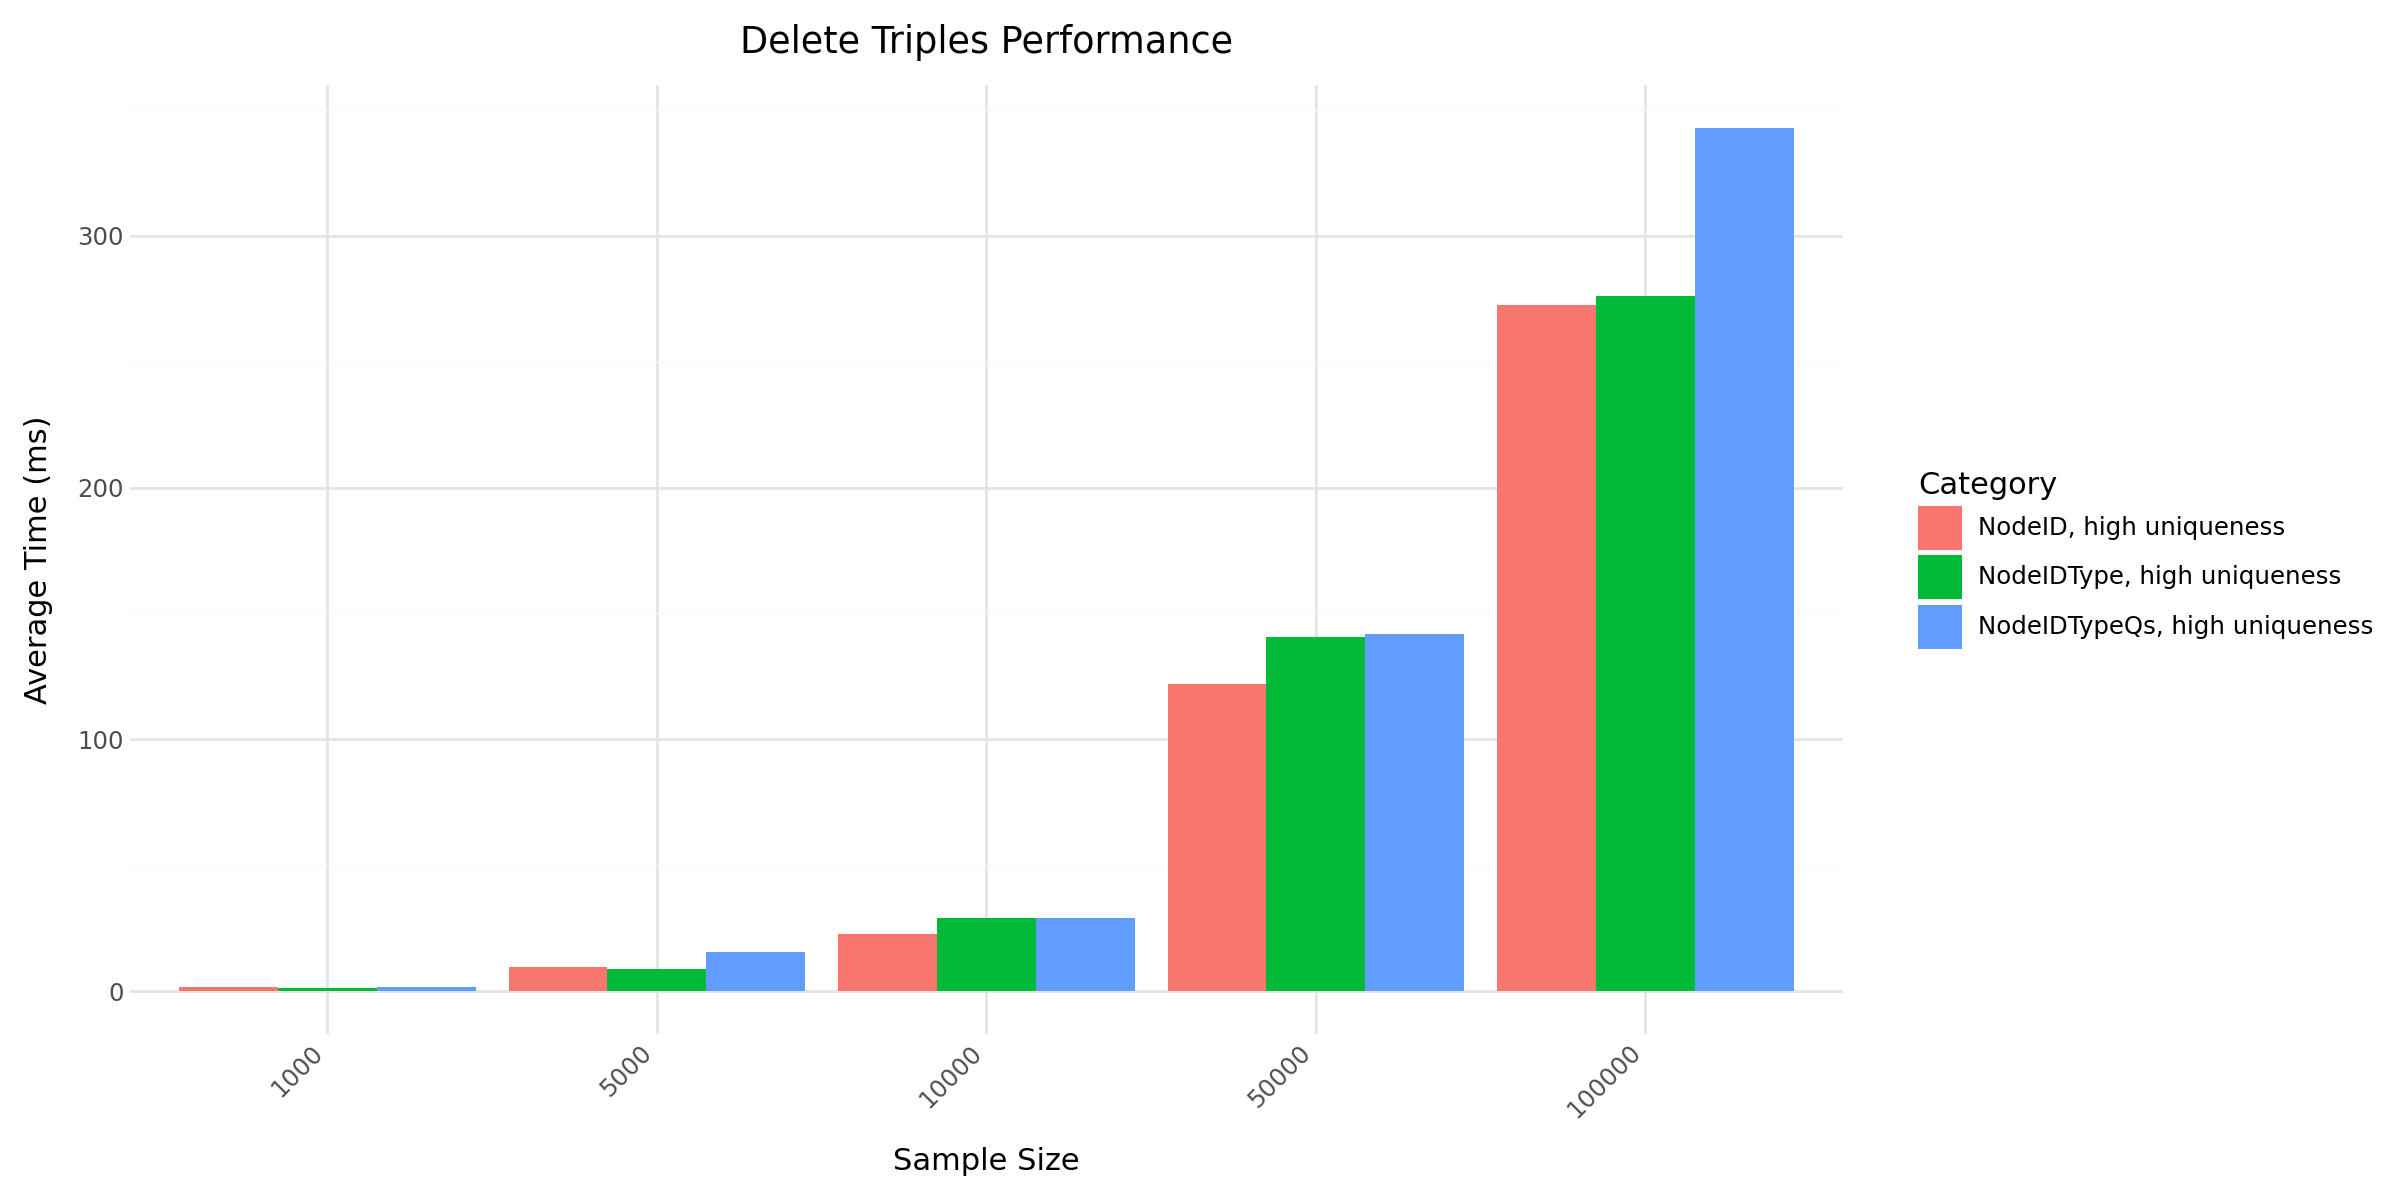

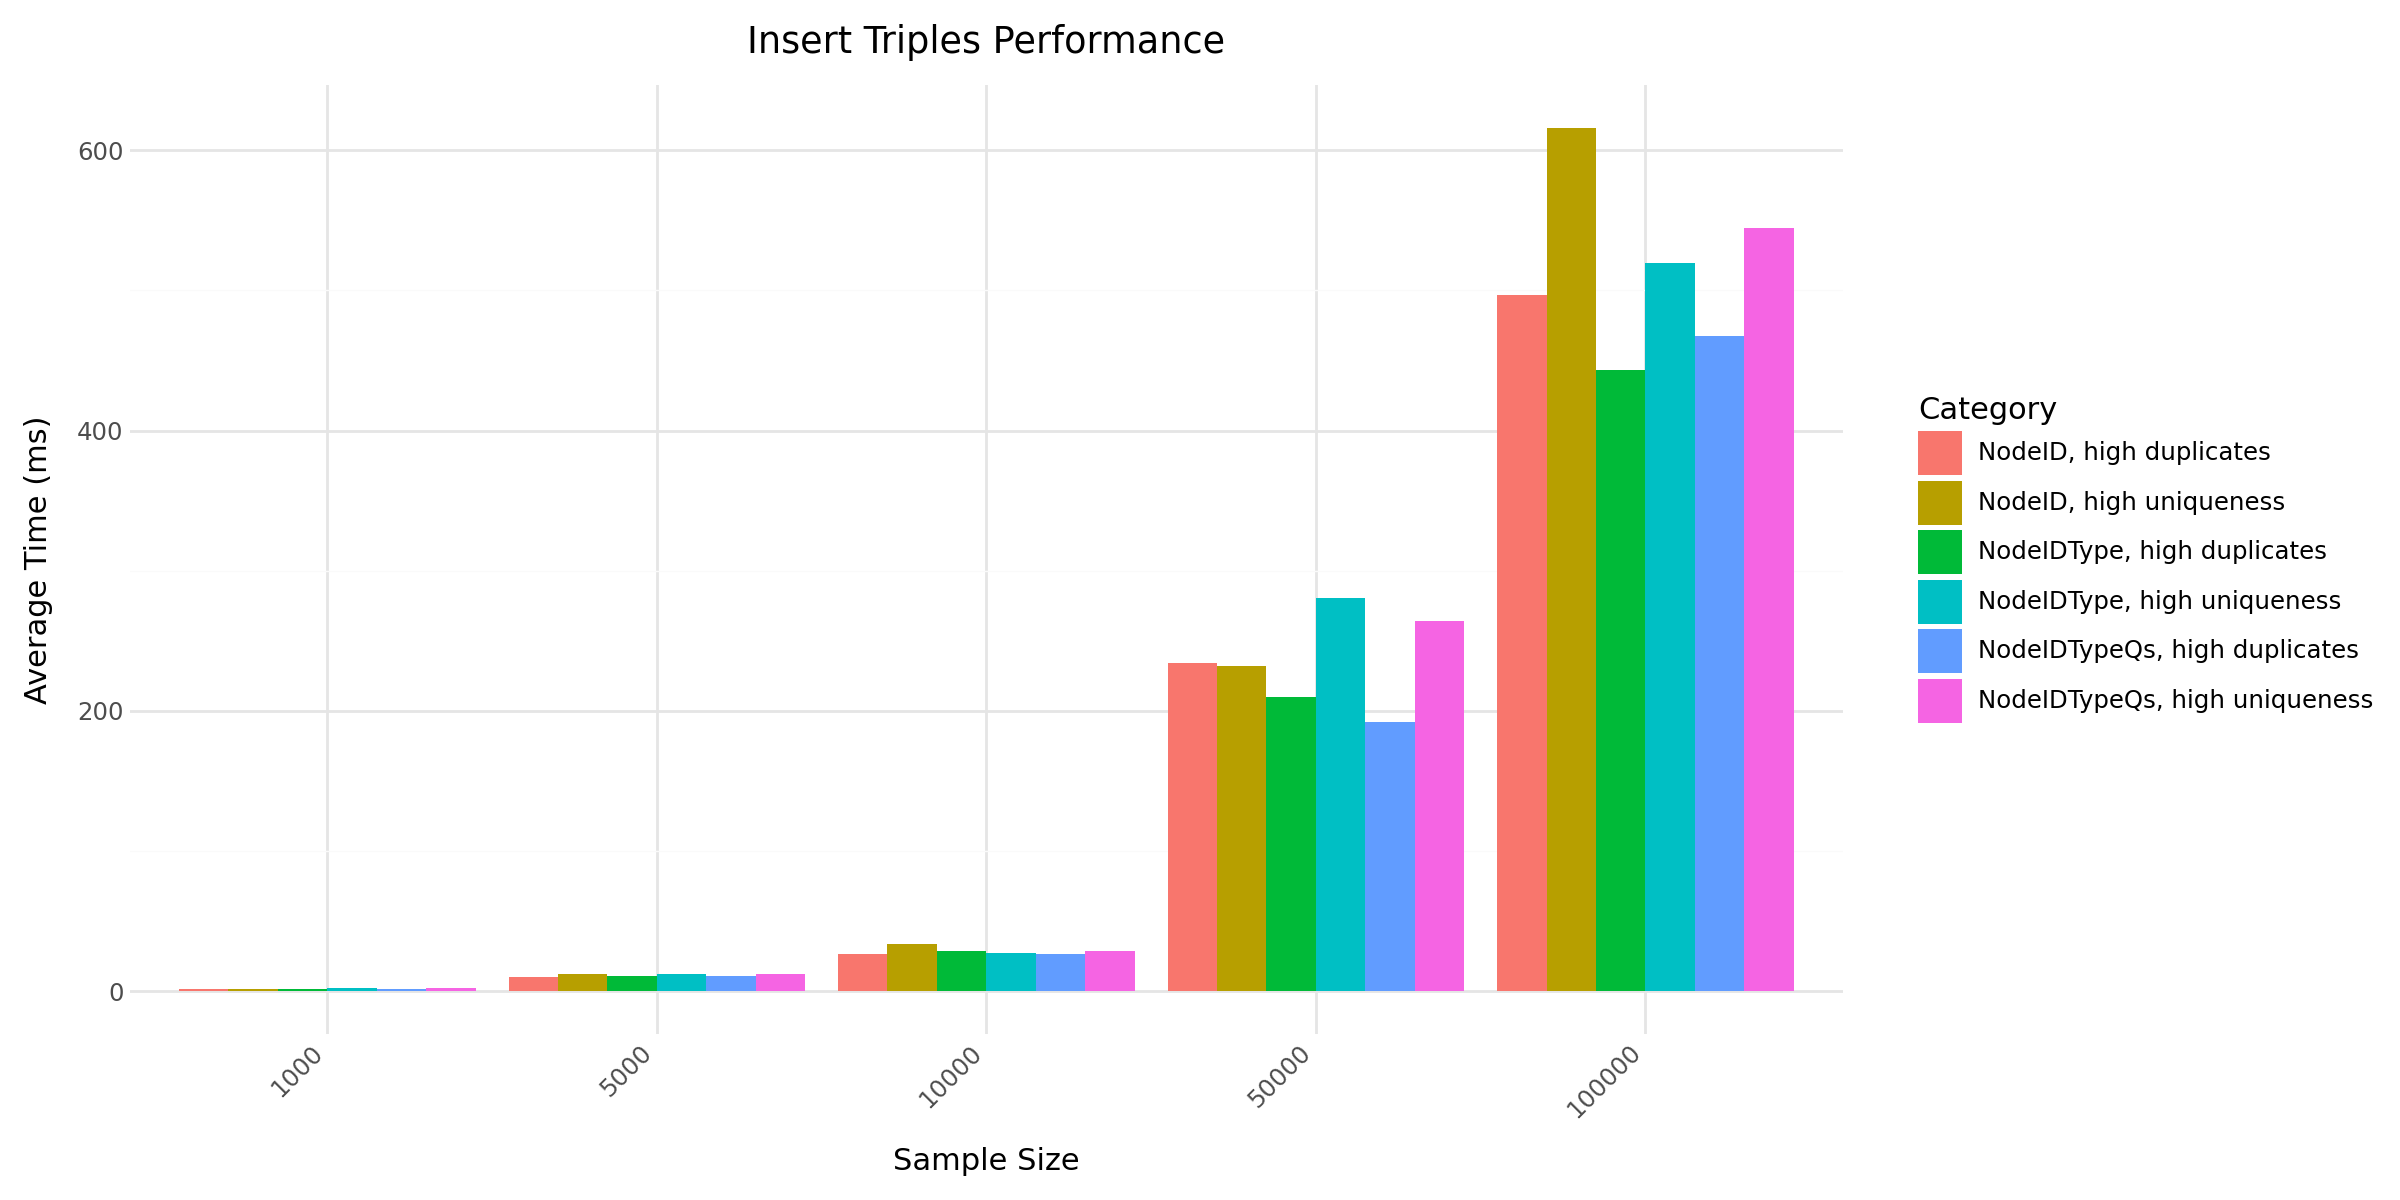

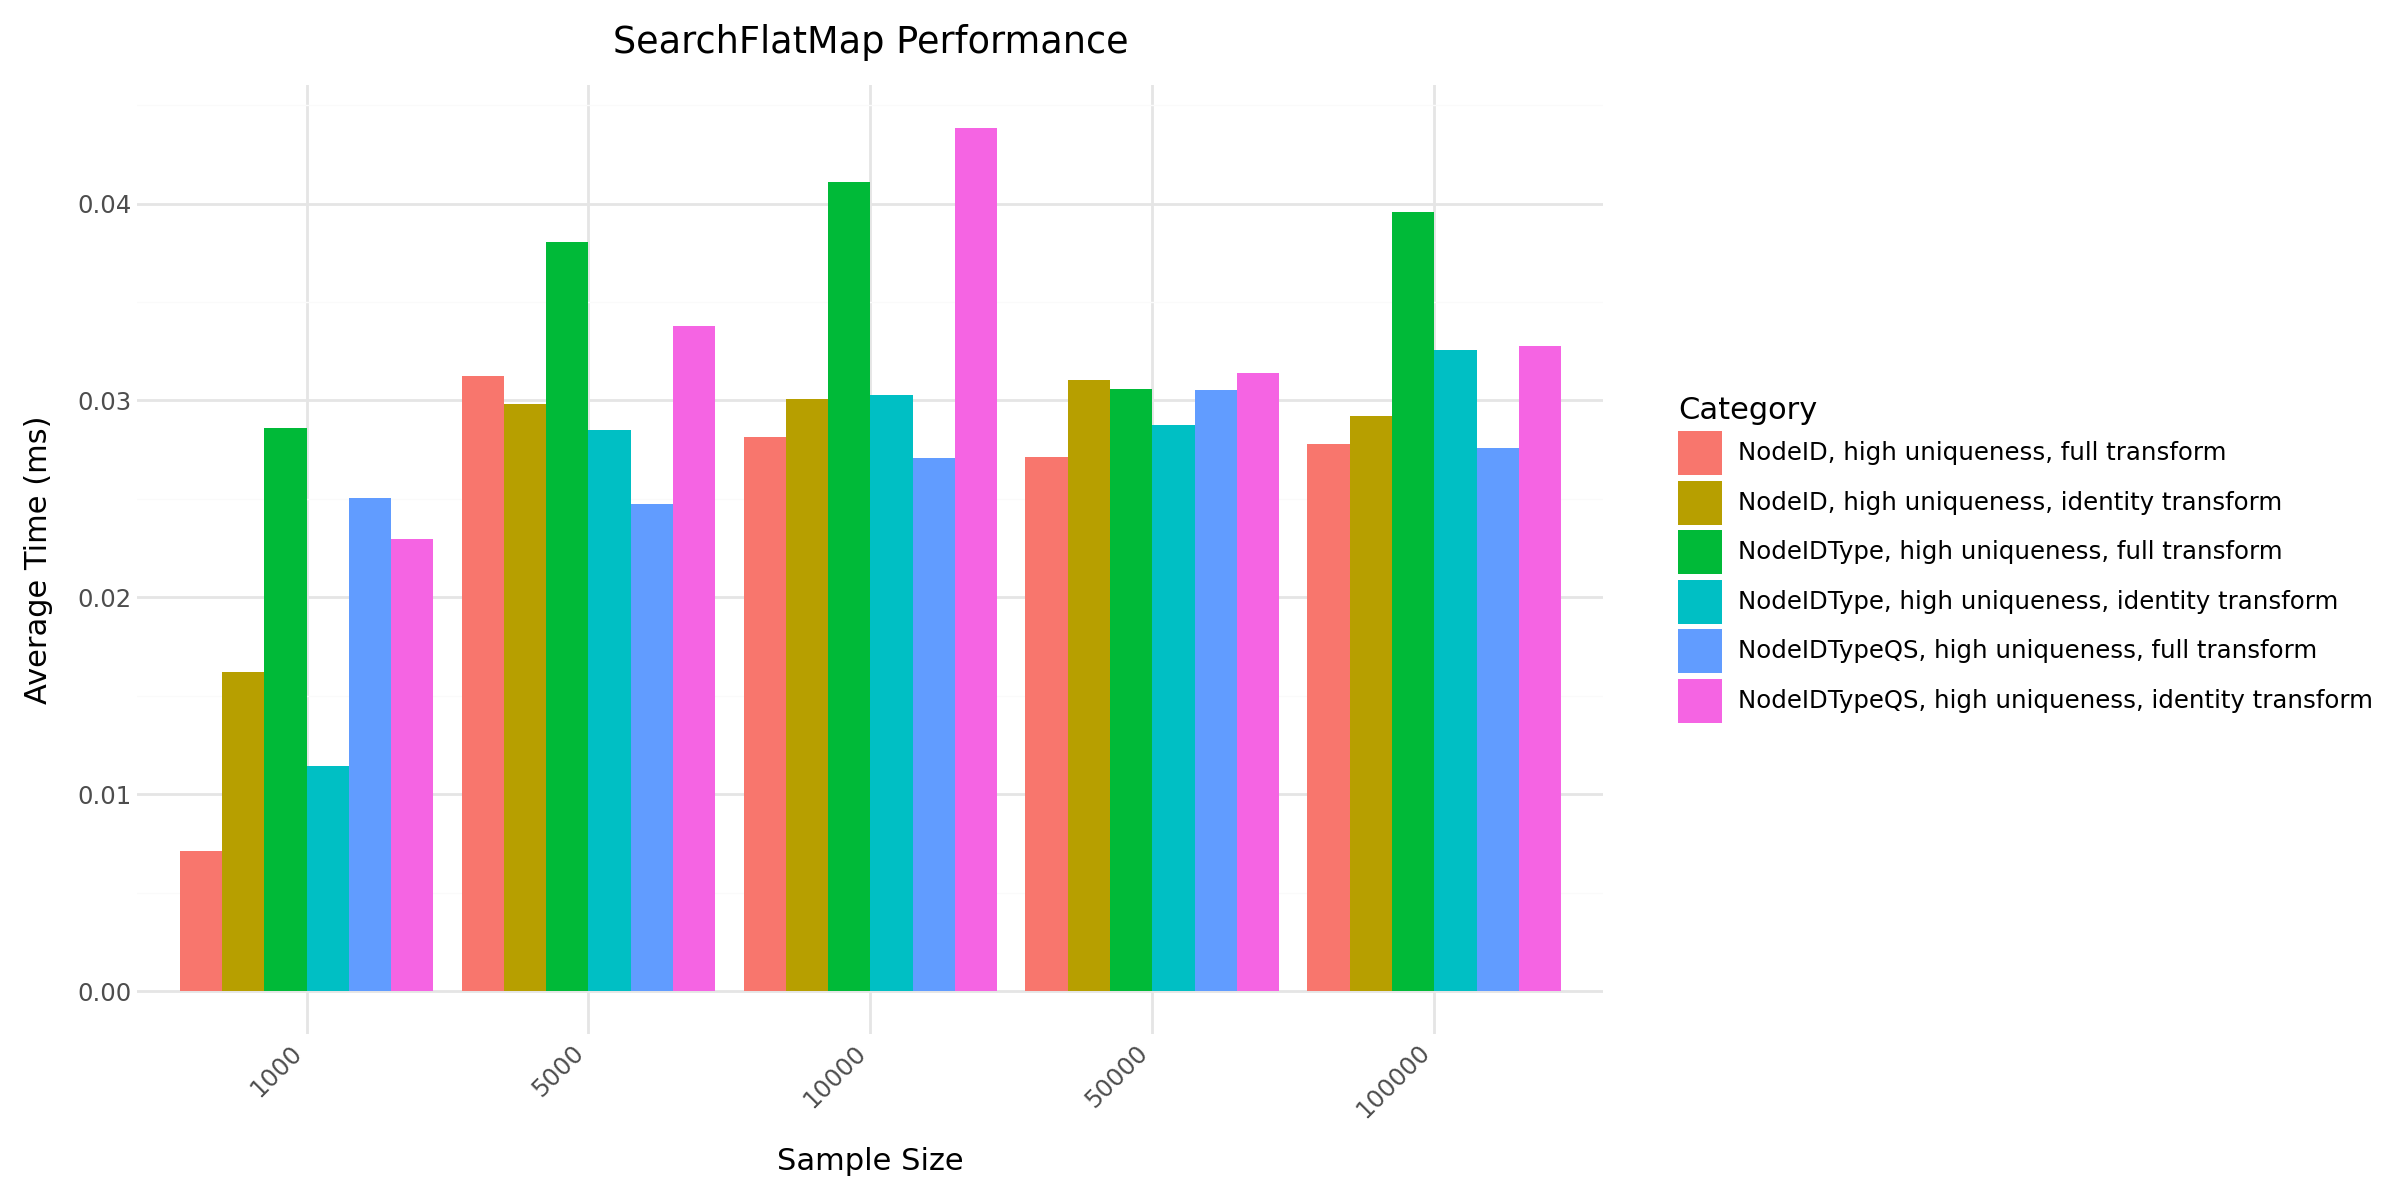

In [ ]:
# Create bar plots for each experiment
experiments = recent_dfr['experiment'].unique()

for experiment in experiments:
    exp_data = recent_dfr[recent_dfr['experiment'] == experiment].copy()
    exp_data['avg_ms'] = exp_data['avg_ns'] / 1_000_000

    plot = (
        ggplot(exp_data, aes(x='factor(sampleSize)', y='avg_ms', fill='category'))
        + geom_bar(stat='identity', position='dodge')
        + labs(
            title=f'{experiment} Performance',
            x='Sample Size',
            y='Average Time (ms)',
            fill='Category'
        )
        + theme_minimal()
        + theme(
            axis_text_x=element_text(rotation=45, hjust=1),
            figure_size=(12, 6)
        )
    )

    display(plot)

In [ ]:
# Let's inspect the SearchFlatMap data more closely
searchflatmap_data = recent_dfr[recent_dfr['experiment'] == 'SearchFlatMap']
print("SearchFlatMap sample data:")
print(searchflatmap_data[['experiment', 'sampleSize', 'category', 'avg_ns', 'min_ns', 'max_ns']].head(10))
print(f"\nAvg_ns range: {searchflatmap_data['avg_ns'].min()} to {searchflatmap_data['avg_ns'].max()}")
print(f"In milliseconds: {searchflatmap_data['avg_ns'].min() / 1_000_000:.2f} to {searchflatmap_data['avg_ns'].max() / 1_000_000:.2f}")